<a href="https://colab.research.google.com/github/ANUNAYBAGGA/AnimeGAN/blob/master/AnimeGEN_64x64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import keras

import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import glob
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(510, 64, 64, 3)


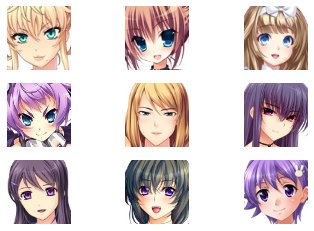

In [10]:
images = [cv2.resize(cv2.imread(file),(64,64)) for file in glob.glob("gdrive/My Drive/anime_dataset/*.jpg")]
train = np.asarray(images)
r,c = 3,3
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
  for j in range(c):
    axs[i,j].imshow(cv2.cvtColor(train[cnt], cv2.COLOR_BGR2RGB))
    axs[i,j].axis('off')
    cnt += 1
print(train.shape)

In [0]:
channels = 3
rows = 64
cols = 64
batch_size = 128
no_epoch = 20000
img_shape = (64,64,3)
latent_dim = 100
sampling_size = 1000

In [12]:
def Discriminator(): 
        model = Sequential() 
  
        model.add(Conv2D(32, kernel_size=3, strides=2, 
                         input_shape=img_shape, padding="same")) 
        model.add(LeakyReLU(alpha=0.2)) 
        model.add(Dropout(0.25)) 
          
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same")) 
        model.add(ZeroPadding2D(padding=((0,1),(0,1)))) 
        model.add(BatchNormalization(momentum=0.82)) 
        model.add(LeakyReLU(alpha=0.25)) 
        model.add(Dropout(0.25)) 
          
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same")) 
        model.add(BatchNormalization(momentum=0.82)) 
        model.add(LeakyReLU(alpha=0.2)) 
        model.add(Dropout(0.25)) 
          
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same")) 
        model.add(BatchNormalization(momentum=0.8)) 
        model.add(LeakyReLU(alpha=0.25)) 
        model.add(Dropout(0.25)) 
          
        #Building the output layer 
        model.add(Flatten()) 
        model.add(Dense(1, activation='sigmoid')) 
  
        image = Input(shape=img_shape) 
        validity = model(image) 
        model.summary()
        return Model(image, validity) 
def Generator():
        model = Sequential() 
  
        #Building the input layer 
        model.add(Dense(128 * 8 * 8, activation="relu", 
                        input_dim=latent_dim)) 
        model.add(Reshape((8, 8, 128))) 
          
        model.add(UpSampling2D()) 
          
        model.add(Conv2D(128, kernel_size=3, padding="same")) 
        model.add(BatchNormalization(momentum=0.78)) 
        model.add(Activation("relu")) 
          
        model.add(UpSampling2D()) 
          
        model.add(Conv2D(64, kernel_size=3, padding="same")) 
        model.add(BatchNormalization(momentum=0.78)) 
        model.add(Activation("relu")) 
        model.add(UpSampling2D())
        model.add(Conv2D(3, kernel_size=3, padding="same")) 
        model.add(Activation("tanh")) 
  
  
        #Generating the output image 
        noise = Input(shape=(latent_dim,)) 
        image = model(noise) 
        model.summary()
        return Model(noise, image) 
'''def combine():
        D = Discriminator()
        G = Generator()
        z = Input(shape=(latent_dim,))
        im = G(z)
        D.trainable = False
        valid = D(im)
        combined = Model(z,valid)
        combined.compile(loss='binary_crossentropy', optimizer='adam')
        D.trainable = True
        return combined'''
D = Discriminator()
D.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
D.trainable = False
G = Generator()
z = Input(shape=(latent_dim,))
im = G(z)
valid = D(im)
combined = Model(z,valid)
'''
def combine():
  combined = Sequential()
  combined.add(G)
  combined.add(D)
  return combined
combined = combine()
'''
# combined.trainable = False
combined.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
combined.summary()
# G.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 17, 17, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 17, 17, 64)        256       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 17, 17, 64)       

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 4.786443, acc.: 19.92%]
G_LOSS  =  [0.030121265, 1.0]


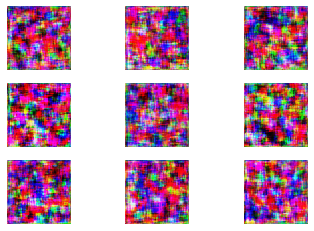

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000 [D loss: 0.009281, acc.: 99.61%]
G_LOSS  =  [13.646143, 0.0078125]


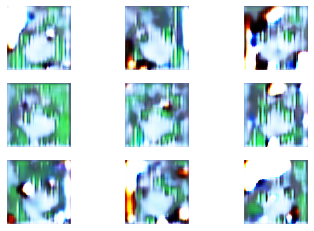

2000 [D loss: 0.089645, acc.: 98.05%]
G_LOSS  =  [12.643295, 0.0078125]


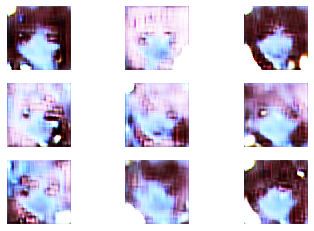

3000 [D loss: 0.001263, acc.: 100.00%]
G_LOSS  =  [15.86282, 0.0]


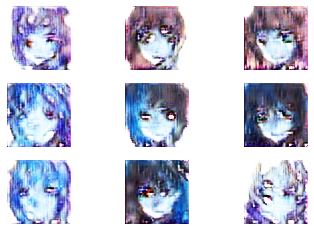

4000 [D loss: 0.009900, acc.: 99.61%]
G_LOSS  =  [12.646653, 0.0]


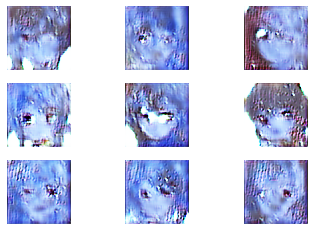

5000 [D loss: 0.012377, acc.: 99.61%]
G_LOSS  =  [15.515163, 0.0]


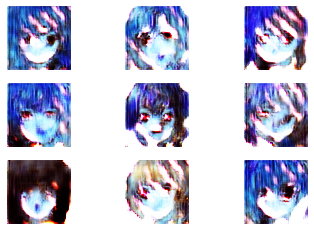

6000 [D loss: 0.053388, acc.: 97.66%]
G_LOSS  =  [10.682281, 0.046875]


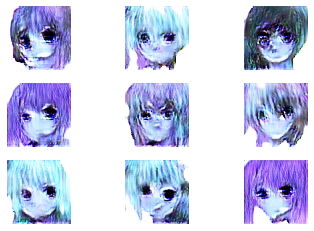

7000 [D loss: 0.058144, acc.: 98.05%]
G_LOSS  =  [10.636154, 0.0234375]


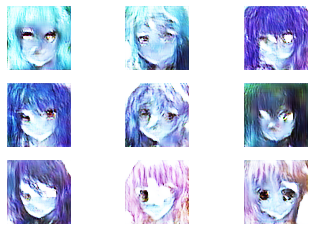

8000 [D loss: 0.018467, acc.: 99.61%]
G_LOSS  =  [8.801224, 0.015625]


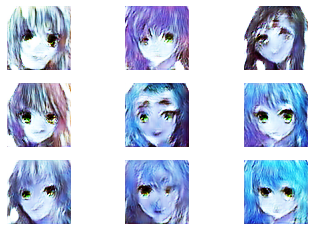

9000 [D loss: 0.006094, acc.: 99.61%]
G_LOSS  =  [10.328444, 0.0078125]


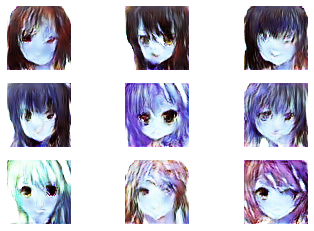

10000 [D loss: 0.131177, acc.: 95.70%]
G_LOSS  =  [8.611481, 0.0546875]


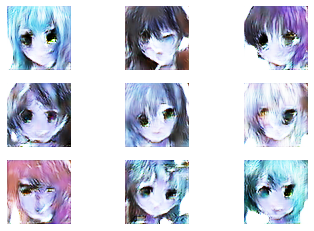

11000 [D loss: 0.075679, acc.: 96.88%]
G_LOSS  =  [13.999583, 0.0]


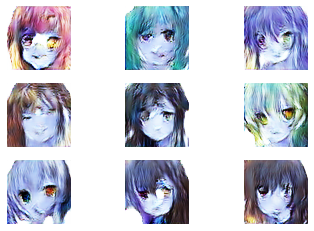

12000 [D loss: 0.061064, acc.: 98.05%]
G_LOSS  =  [7.853539, 0.0390625]


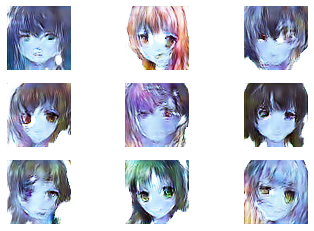

13000 [D loss: 0.033323, acc.: 98.44%]
G_LOSS  =  [11.16621, 0.0]


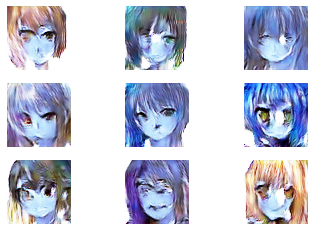

14000 [D loss: 0.003074, acc.: 100.00%]
G_LOSS  =  [12.178213, 0.0]


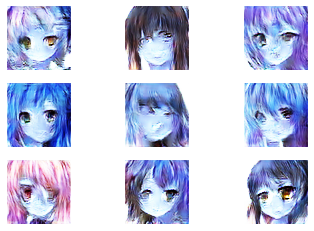

15000 [D loss: 0.024957, acc.: 98.44%]
G_LOSS  =  [10.453637, 0.0078125]


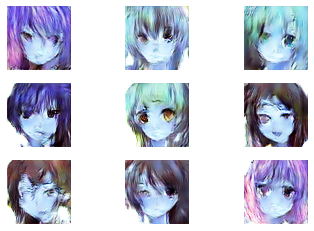

16000 [D loss: 0.028240, acc.: 98.83%]
G_LOSS  =  [9.634402, 0.015625]


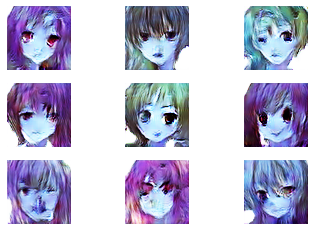

17000 [D loss: 0.016115, acc.: 99.61%]
G_LOSS  =  [10.438631, 0.0234375]


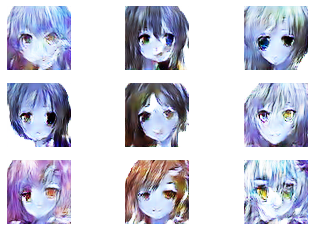

18000 [D loss: 0.021269, acc.: 99.61%]
G_LOSS  =  [11.481618, 0.0]


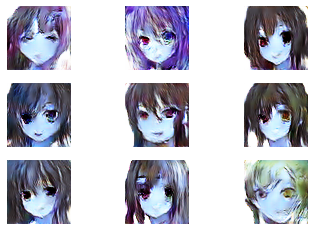

19000 [D loss: 0.006948, acc.: 99.61%]
G_LOSS  =  [10.454483, 0.0]


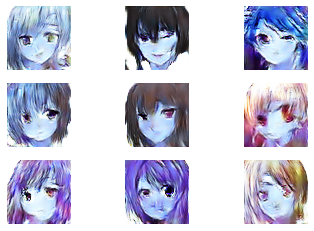

In [13]:

def display_images(): 
        r, c = 3,3
        noise = np.random.normal(0, 1, (r * c,latent_dim)) 
        generated_images = G.predict(noise) 
  
        #Scaling the generated images 
        generated_images = 0.5 * generated_images + 0.5

        fig, axs = plt.subplots(r, c) 
        count = 0
        for i in range(r): 
            for j in range(c): 
                axs[i,j].imshow(generated_images[count, :,:,]) 
                axs[i,j].axis('off') 
                count += 1
        plt.show() 
        plt.close() 

valid = np.ones((batch_size,1))
fake = np.zeros((batch_size,1))
train = (train / 127.5) - 1.
#bce = keras.losses.BinaryCrossentropy()
for epoch in range(no_epoch):
            #print(1)
            rand_indexes = np.random.randint(0,train.shape[0],batch_size)
            images = train[rand_indexes]
            #print(2)
            noise = np.random.normal(0,1,(batch_size,latent_dim))
            generated_batch = G.predict(noise)
            d_loss_real = D.train_on_batch(images,valid)
            d_loss_fake = D.train_on_batch(generated_batch,fake)
            d_loss = 0.5*np.add(d_loss_real , d_loss_fake)
            #print(3)
            g_loss = combined.train_on_batch(noise,valid)
            if epoch%sampling_size==0:
              print ("%d [D loss: %f, acc.: %.2f%%]" % (epoch, d_loss[0], 100*d_loss[1]))
              print("G_LOSS  = " , g_loss)

              display_images()